In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/Wongwahmeni-total.csv', encoding='utf-8', engine='python', 
                 quotechar='"', verbose=True)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43.csv', encoding='utf-8', engine='python', 
#                  quotechar='"', verbose=True)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43-stub.csv', encoding='utf-8', engine='python', 
#                  quotechar='"', verbose=True)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43-stub-2.csv', encoding='utf-8', engine='python', 
#                  verbose=True, header=0, index_col=False)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43-stub-2.csv', encoding='utf-8', engine='python')
df = df.reset_index()
df.columns = ["Date","Time","UserID","UserName","MessageBody"]
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date', 'Time'])

Filled 1158 NA values in column Date


In [278]:
df.describe()

,UserID
count,5.928480e+05
mean,8.486530e+13
std,3.584158e+13
min,1.125265e+09
25%,1.000002e+14
50%,1.000004e+14
75%,1.000011e+14
max,1.000358e+14


In [279]:
df.head(10)

,UserID,UserName,MessageBody,DateTime
0,1764877696,Michal Svoboda,Za celý prázdniny,2017-06-14 14:46:39
1,100000219586446,Daniel Lečo Le,Pak nejaky videjka a fotecky pls,2017-06-14 14:46:40
2,100000455812182,Lukáš Aaron Tesař,jsem si uvědomil jednu věc,2017-06-14 14:46:48
3,100000455812182,Lukáš Aaron Tesař,budu chlastat 23.,2017-06-14 14:46:52
4,100000455812182,Lukáš Aaron Tesař,pak 8.,2017-06-14 14:46:55
5,100000455812182,Lukáš Aaron Tesař,a pak na Adviku,2017-06-14 14:46:58
6,100000219586446,Daniel Lečo Le,Kdy je ta parba u Furika btw?,2017-06-14 14:47:01
7,100000455812182,Lukáš Aaron Tesař,a jestli bude i Igorrr,2017-06-14 14:47:03
8,100000455812182,Lukáš Aaron Tesař,no do píči :D,2017-06-14 14:47:05
9,100000455812182,Lukáš Aaron Tesař,co vole?,2017-06-14 14:47:09


In [280]:
df.dtypes

UserID                  int64
UserName               object
MessageBody            object
DateTime       datetime64[ns]
dtype: object

### Some basic statistics


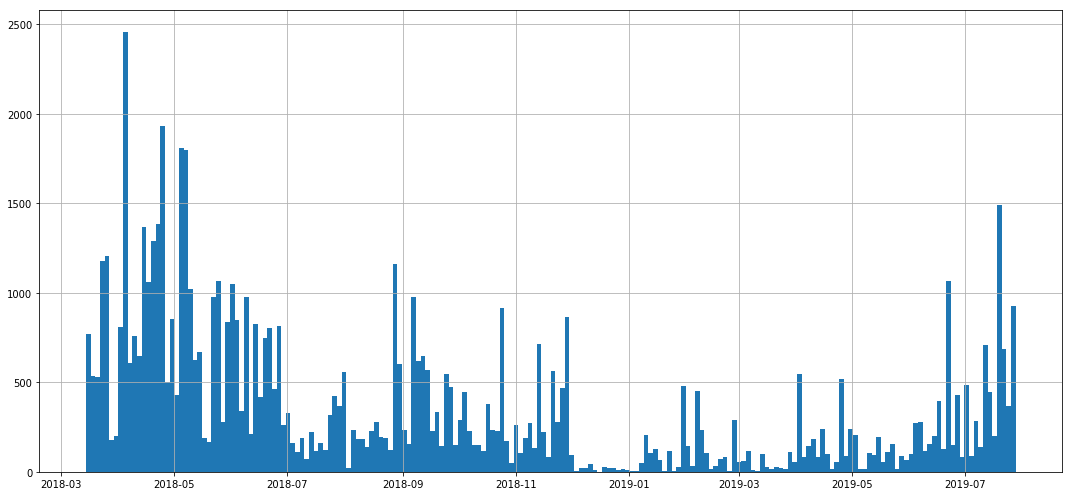

In [6]:
df['DateTime'].hist(bins=200, figsize=(15, 7))
plt.tight_layout()
plt.savefig('plots/wongwahmeni-total-hist.png')

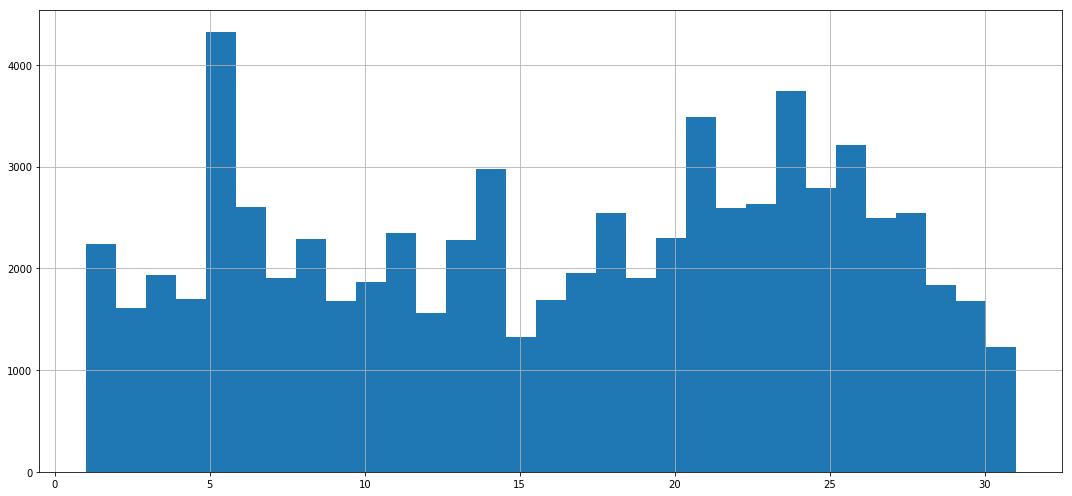

In [8]:
df['DateTime'].dt.day.hist(bins=31, figsize=(15, 7))
plt.tight_layout()
plt.savefig('plots/wongwahmeni-day-hist.png')

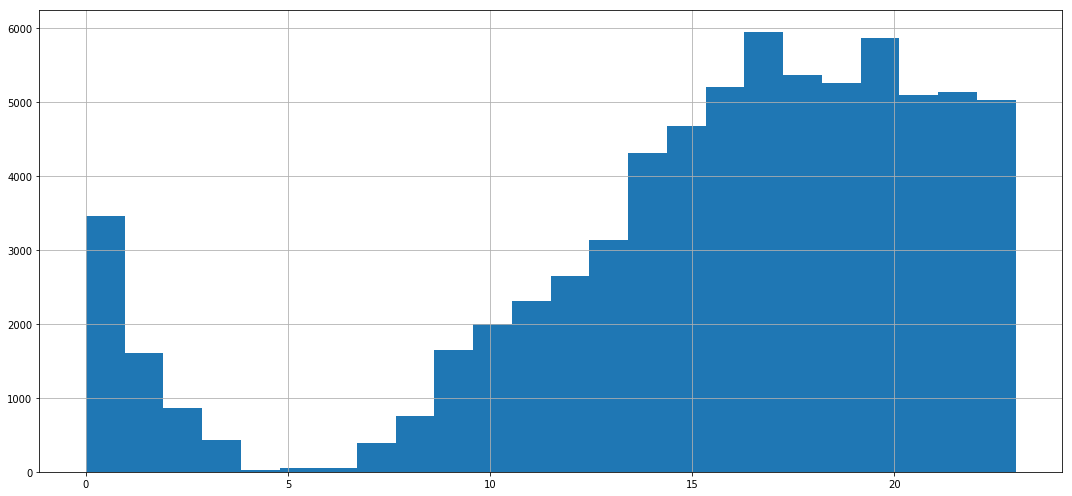

In [10]:
df['DateTime'].dt.hour.hist(bins=24, figsize=(15, 7))
plt.tight_layout()
plt.savefig('plots/wongwahmeni-day-hist.png')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


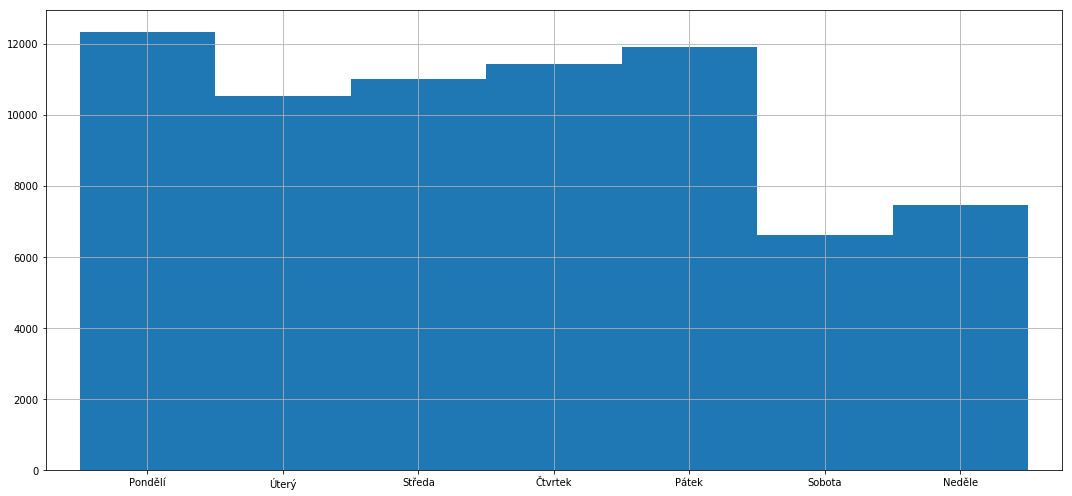

In [48]:
to_day_name = {i: j for i, j in enumerate(['Pondělí', 'Úterý', 'Středa', 'Čtvrtek', 'Pátek', 'Sobota', 'Neděle'])}
df['DateTime'].dt.dayofweek.value_counts().sort_index().rename(to_day_name).plot.bar(figsize=(15, 7), width=1.)
plt.grid('On')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('plots/wongwahmeni-day-in-week-hist.png')

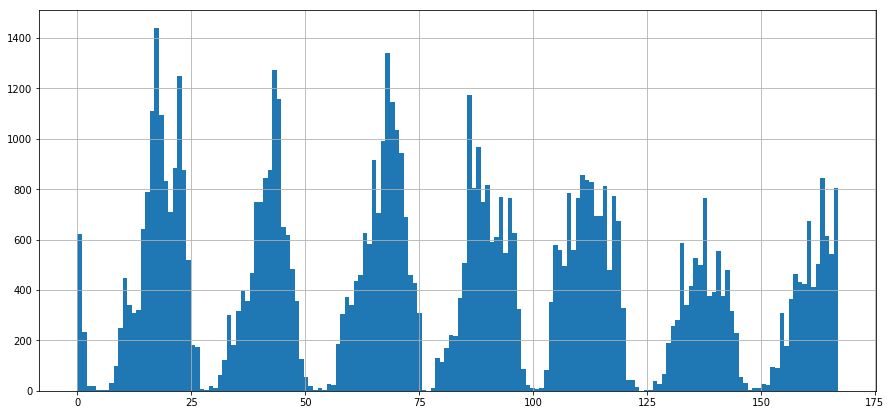

In [49]:
(df['DateTime'].dt.dayofweek * 24 + df['DateTime'].dt.hour).hist(bins=24 * 7, figsize=(15, 7))

In [50]:
df['UserName'].value_counts()

Filip Poetyk Skoumal            23776
Matěj Račinský                  17654
Radek Jaša                      10360
Slabko Shiro                     5795
Tomáš Račinský                   4360
Jindřich Dušek                   3543
Pepa Matoušek                    2645
Vít Dang                         1467
Kristýna Matoušková               621
Filip Vacek                       279
Matúš Nagy                        236
Tomáš Kaizr                       166
Jakub Brabec                      145
Maki Tabitha Firestone            110
Ivoš Koptos Randula                32
Daniel Kos                         28
Eliška Jelizaveta Tůmová           25
Peter Šulc                         12
Filip Macho                        11
Removed user 100001231147296        1
Valerián Glacies                    1
Name: UserName, dtype: int64

In [296]:
df['UserName'].value_counts()[:35]

Niko Albert                     46883
Dominik Krisztof                45334
Adam Krása                      42436
Filip Tran                      33533
Michal Mikuš                    33185
Adam Furik                      27024
Zdeněk Pešek                    26954
Daniel Lečo Le                  26525
Lucas Dičér                     26474
Michal Fox Řehák                23753
Matěj Račinský                  22119
Zdeněk Pala                     21739
Vojtěch Malman Divák            20084
Honza Horgoš                    19490
Lukáš Aaron Tesař               19118
Matěj Fabián                    14813
Petra Zabranská                 13031
Kuba Lysák                      12352
Žožo Králík                     12209
Dominik Lovi Staněk             11778
Michal Svoboda                   9938
Tomáš Krejčíř                    8883
Alexandr Prokič                  8406
Jaroslav Koutník                 5648
Oleksandra Dihuljar              5167
Apolena Gray                     4138
Michal Ulf K

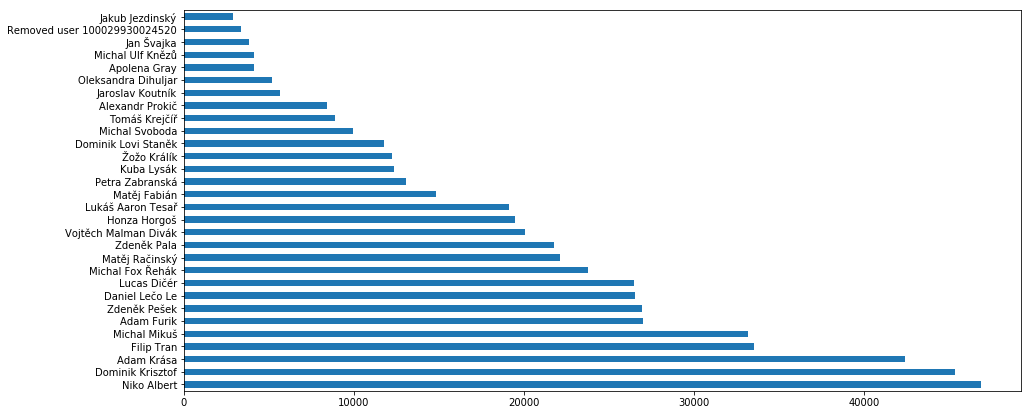

In [297]:
df['UserName'].value_counts()[:30].plot.barh(figsize=(15, 7))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


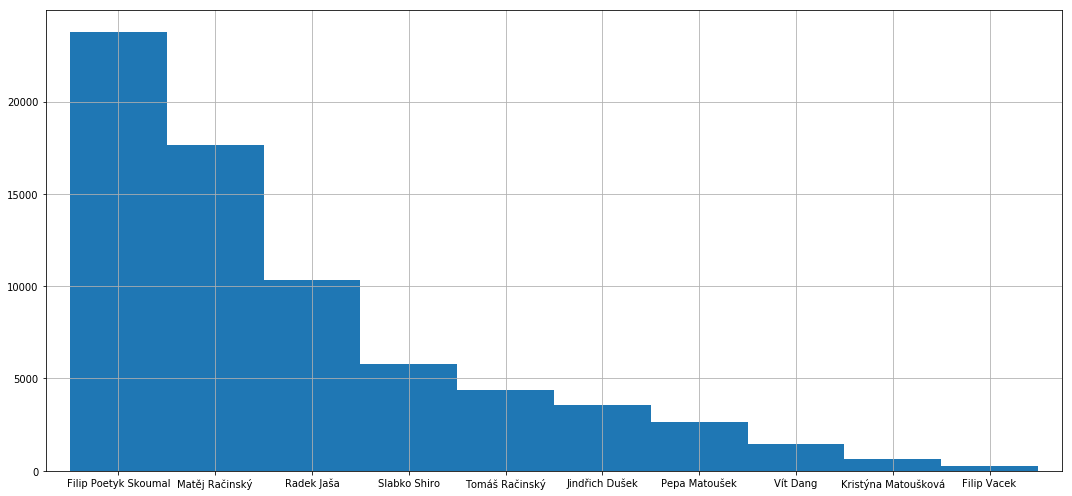

In [60]:
df['UserName'].value_counts()[:10].plot.bar(figsize=(15, 7), width=1.)
plt.grid('On')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('plots/wongwahmeni-aktivni-clenove-top-10.png')

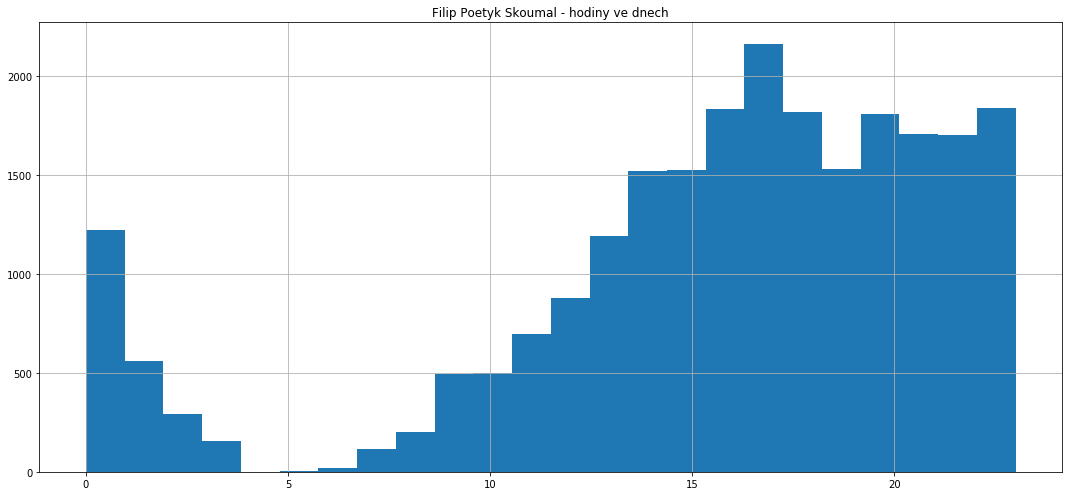

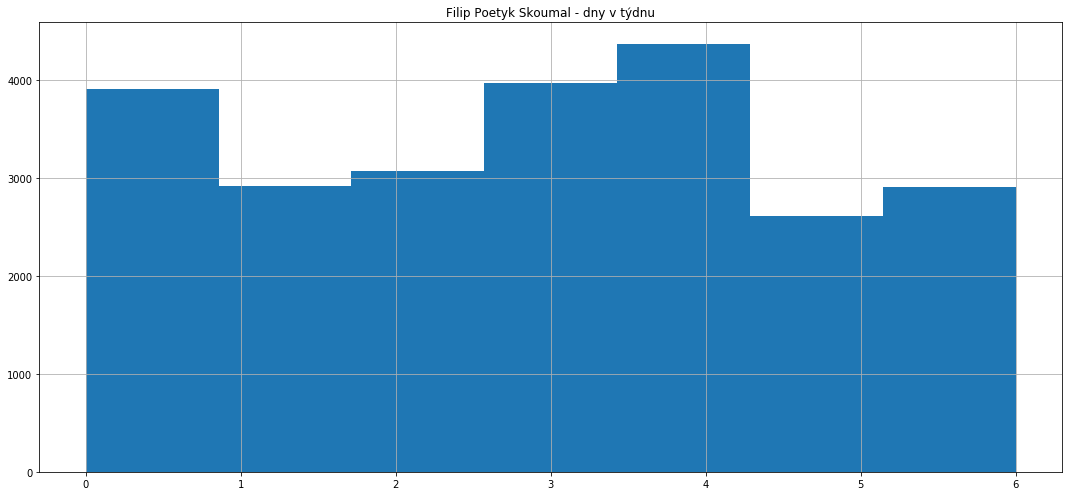

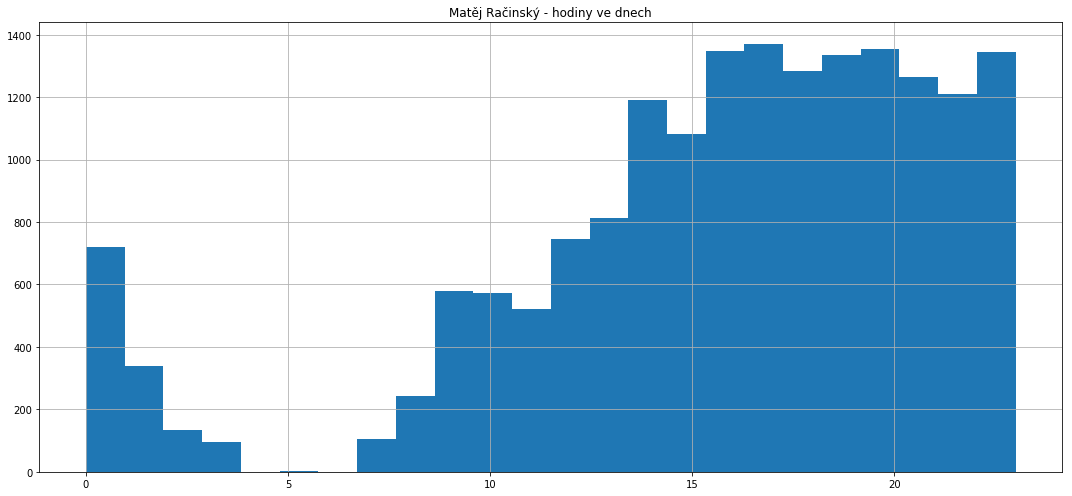

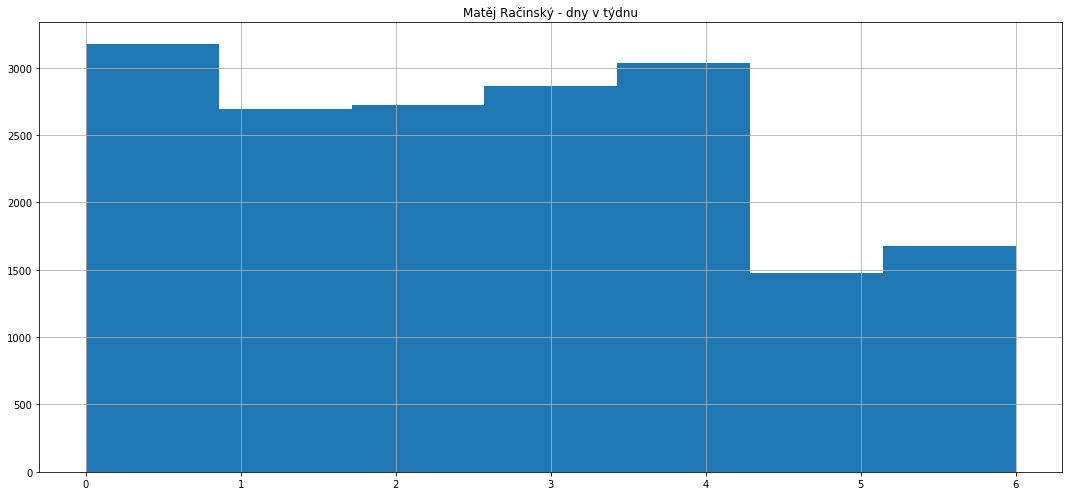

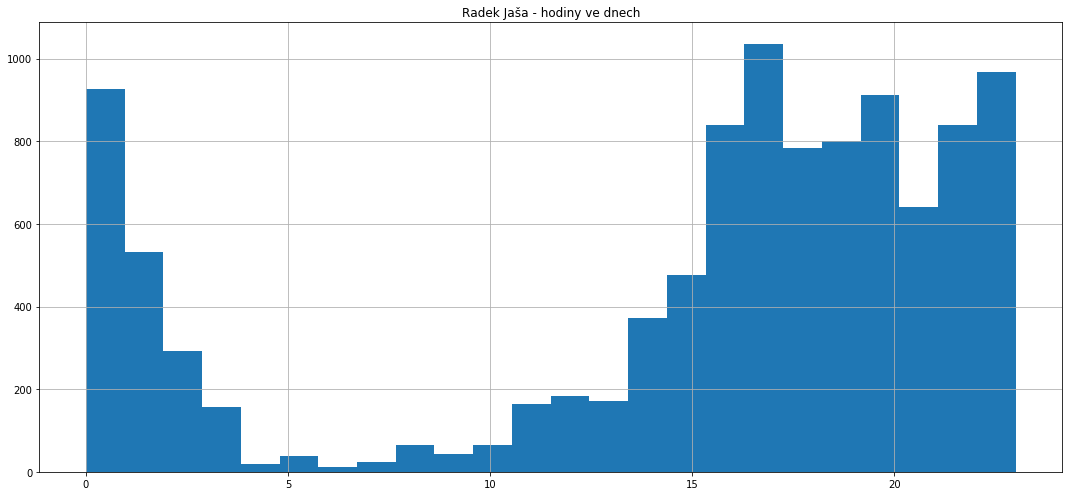

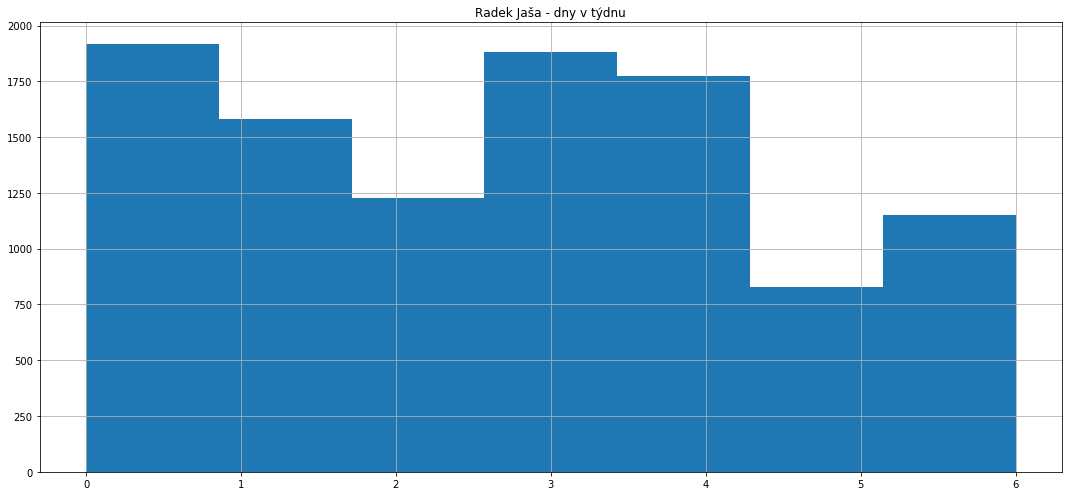

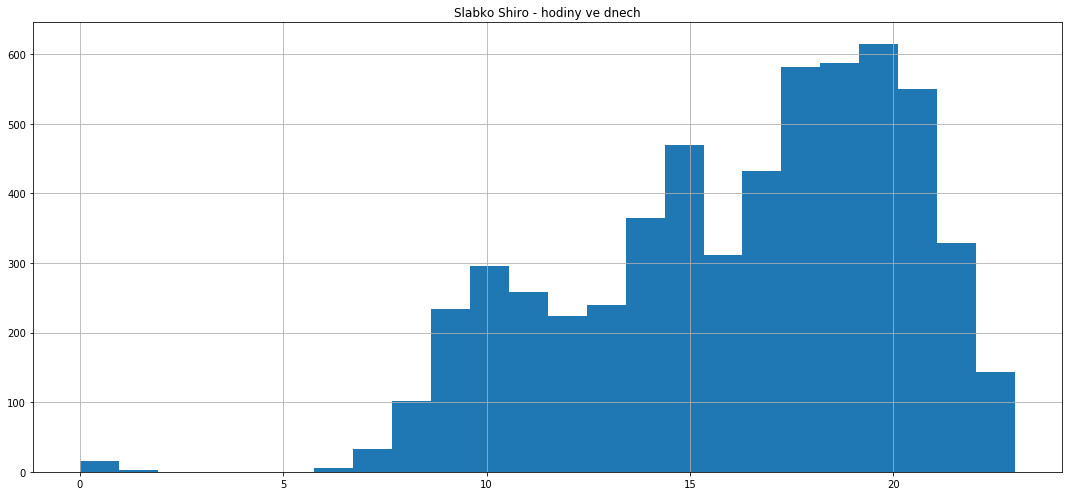

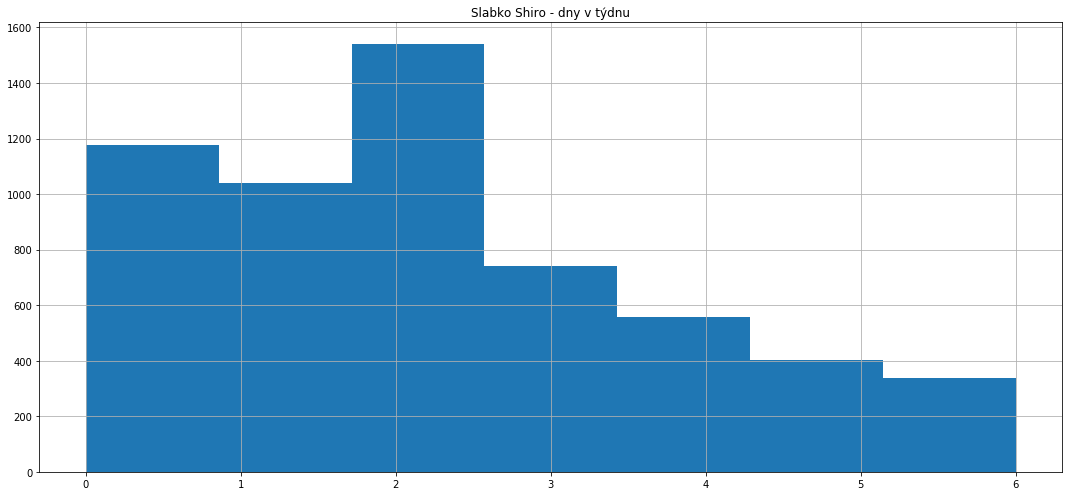

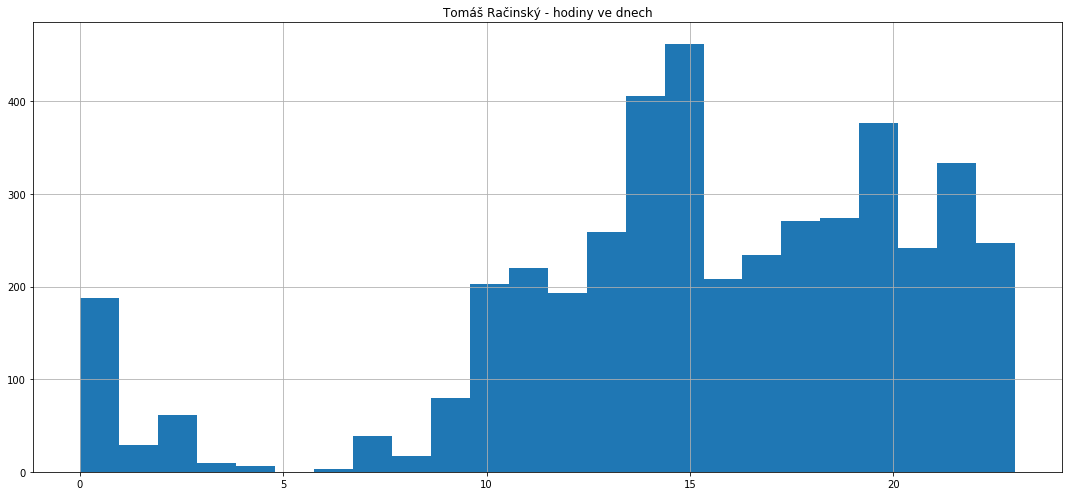

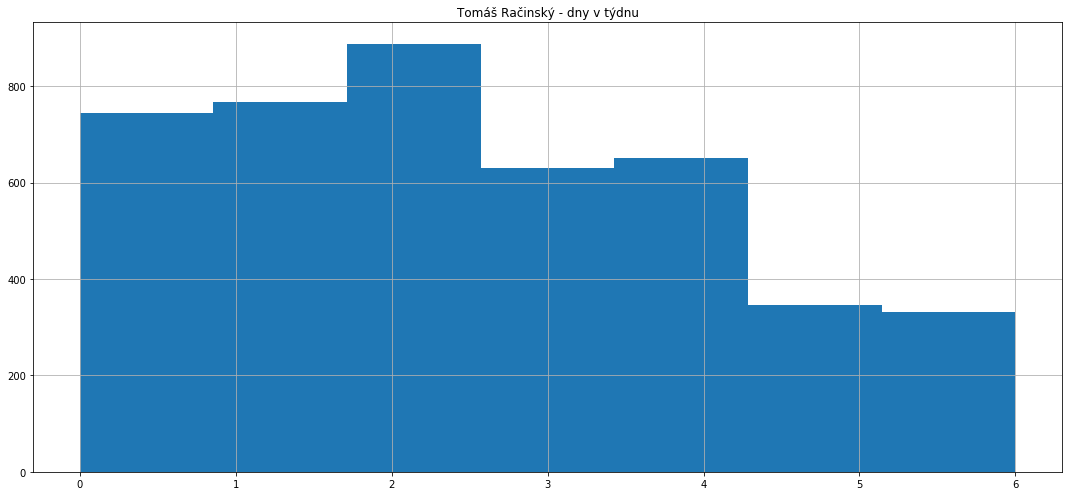

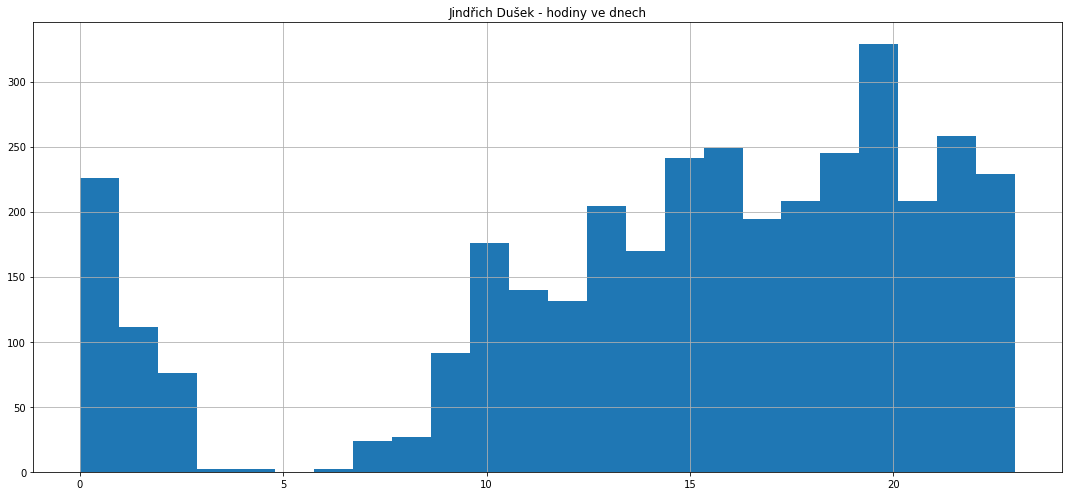

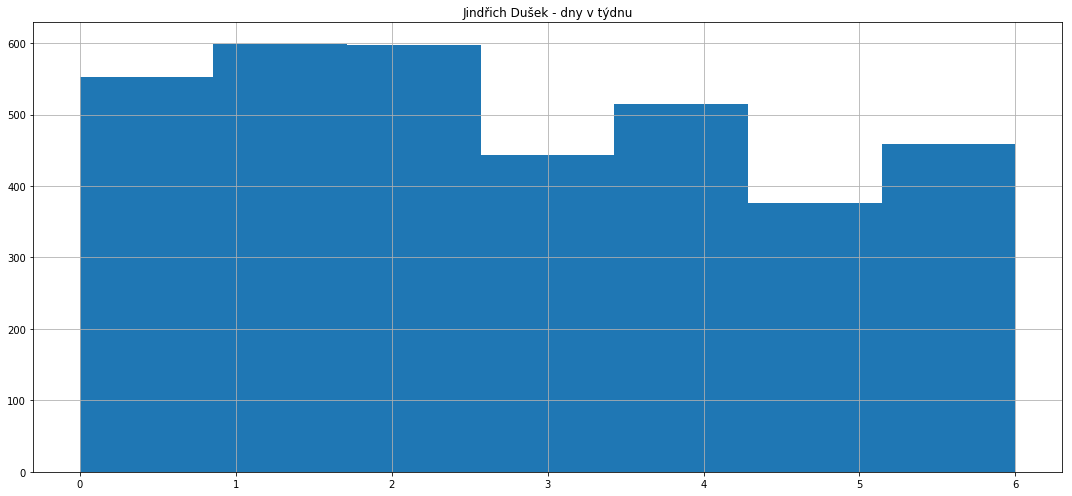

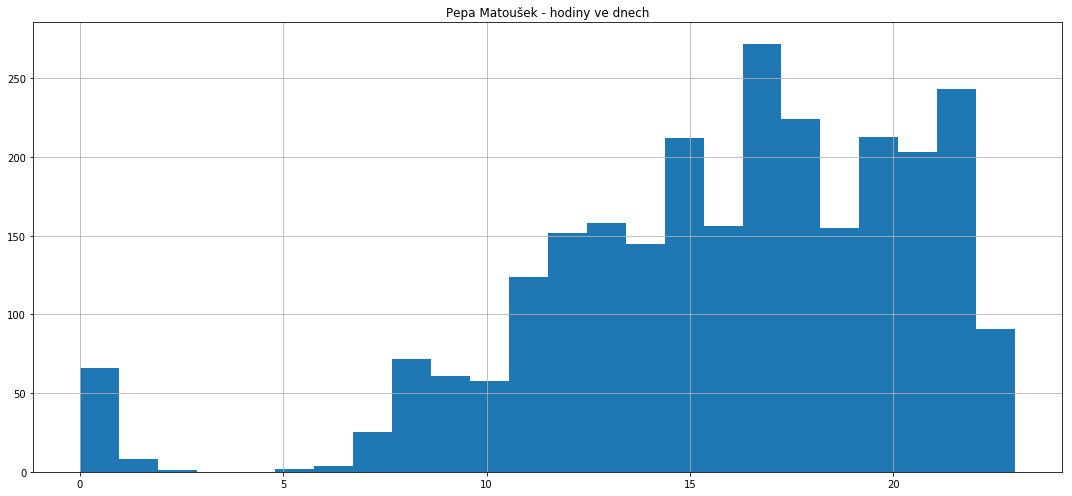

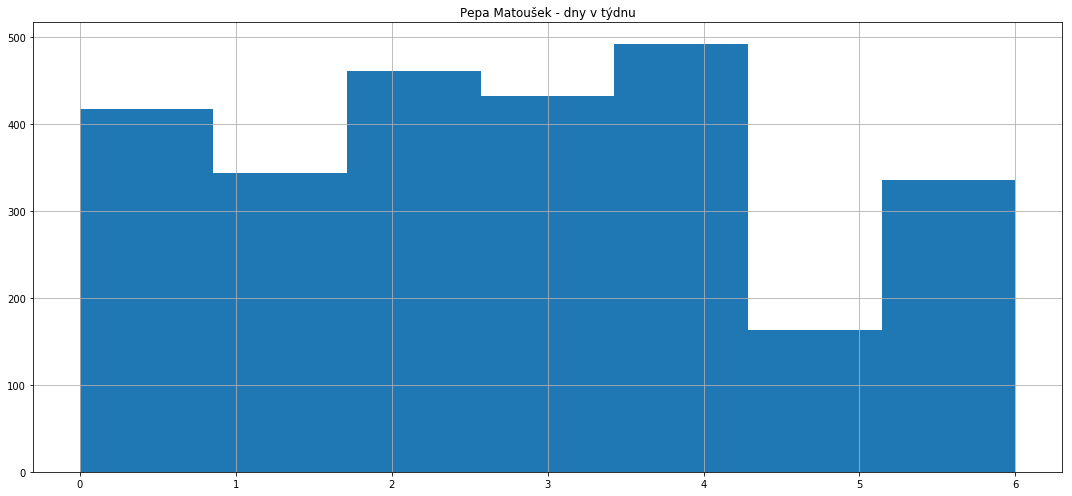

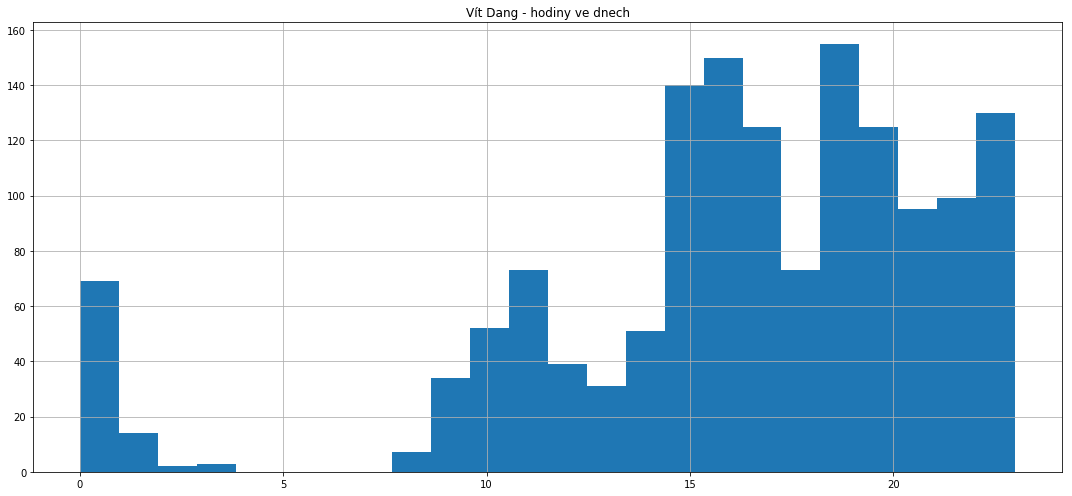

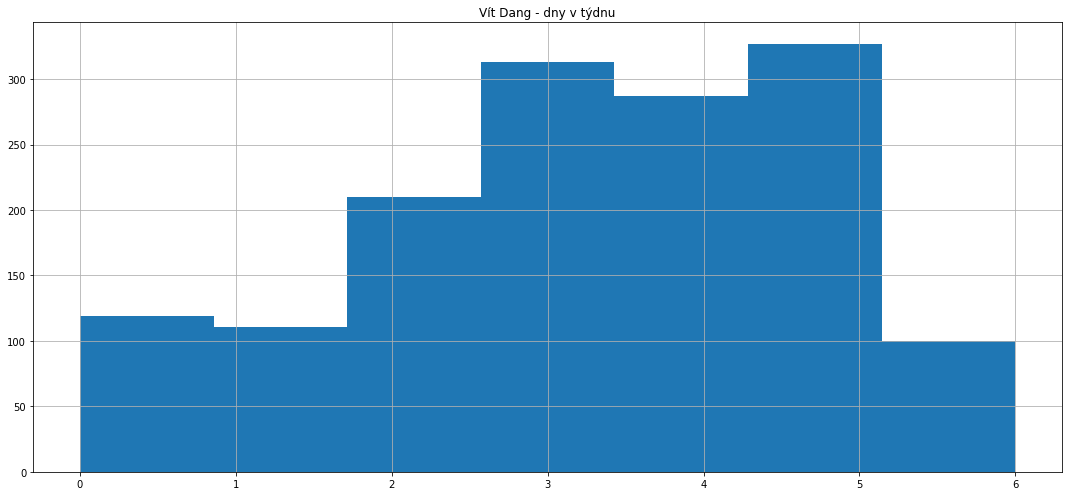

In [63]:
for username in df['UserName'].value_counts()[:8].index:
    plt.figure(figsize=(15, 7))
    plt.title(username + ' - hodiny ve dnech')
    df[df['UserName'] == username]['DateTime'].dt.hour.hist(bins=24)
    plt.tight_layout()
    plt.savefig(f'plots/{username}-hour-hist.png')
    
    plt.figure(figsize=(15, 7))
    plt.title(username + ' - dny v týdnu')
    df[df['UserName'] == username]['DateTime'].dt.dayofweek.hist(bins=7)
    plt.tight_layout()
    plt.savefig(f'plots/{username}-day-hist.png')
    # plt.figure(figsize=(15, 7))
    # plt.title(username + ' in whole interval')
    # df[df['UserName'] == username]['DateTime'].hist(bins=200)
    # plt.figure(figsize=(15, 7))
    # plt.title(username + ' hour in week')
    # (df[df['UserName'] == username]['DateTime'].dt.dayofweek * 24 + df[df['UserName'] == username]['DateTime'].dt.hour).hist(bins=24 * 7)

### Analyzing how people interact with each other
Counting next message below X minutes threshold as an interaction. 

In [64]:
df = df.sort_values('DateTime')

In [65]:
df['DateTime'].diff().iloc[1:]

1       00:00:20
2       00:00:02
3       00:00:10
4       00:01:20
5       00:00:03
6       00:00:09
7       00:00:16
8       00:00:16
9       00:00:43
10      00:00:21
11      00:00:09
12      00:00:33
13      00:00:29
14      00:00:10
15      00:00:34
16      00:01:46
17      00:00:15
18      00:00:04
19      00:00:16
20      00:27:35
21      00:10:23
22      00:00:35
23      00:17:13
24      00:00:02
25      00:00:49
26      00:00:21
27      00:00:31
28      00:02:17
29      00:05:02
30      00:00:10
          ...   
71237   00:02:21
71238   00:00:27
71239   00:00:16
71240   00:00:02
71241   00:00:04
71242   00:17:31
71243   00:00:44
71244   00:00:57
71245   00:00:44
71246   00:00:09
71247   00:00:52
71248   00:00:20
71249   00:00:09
71250   00:00:13
71251   00:00:48
71252   00:00:32
71253   00:00:36
71254   00:00:30
71255   00:00:27
71256   00:00:20
71257   00:01:08
71258   00:00:10
71259   00:00:09
71260   00:00:05
71261   00:00:29
71262   00:00:41
71263   00:00:20
71264   00:01:

In [66]:
diff_sec = df['DateTime'].diff().iloc[1:].dt.total_seconds()    # type: pd.Series
diff_sec

1          20.0
2           2.0
3          10.0
4          80.0
5           3.0
6           9.0
7          16.0
8          16.0
9          43.0
10         21.0
11          9.0
12         33.0
13         29.0
14         10.0
15         34.0
16        106.0
17         15.0
18          4.0
19         16.0
20       1655.0
21        623.0
22         35.0
23       1033.0
24          2.0
25         49.0
26         21.0
27         31.0
28        137.0
29        302.0
30         10.0
          ...  
71237     141.0
71238      27.0
71239      16.0
71240       2.0
71241       4.0
71242    1051.0
71243      44.0
71244      57.0
71245      44.0
71246       9.0
71247      52.0
71248      20.0
71249       9.0
71250      13.0
71251      48.0
71252      32.0
71253      36.0
71254      30.0
71255      27.0
71256      20.0
71257      68.0
71258      10.0
71259       9.0
71260       5.0
71261      29.0
71262      41.0
71263      20.0
71264      88.0
71265     444.0
71266       5.0
Name: DateTime, Length: 

In [67]:
diff_sec.value_counts()

4.0         2907
2.0         2854
3.0         2793
5.0         2769
6.0         2742
7.0         2514
8.0         2385
9.0         2292
10.0        2154
1.0         2150
11.0        1887
12.0        1825
13.0        1642
14.0        1523
15.0        1447
16.0        1377
17.0        1221
18.0        1105
19.0        1088
0.0         1043
20.0         976
22.0         920
21.0         910
23.0         845
24.0         756
25.0         719
26.0         688
27.0         654
28.0         593
29.0         590
            ... 
7340.0         1
36182.0        1
177484.0       1
20146.0        1
2261.0         1
4521.0         1
2187.0         1
1970.0         1
7085.0         1
5544.0         1
5468.0         1
7613.0         1
52591.0        1
1246.0         1
9058.0         1
32493.0        1
36245.0        1
2689.0         1
5897.0         1
2265.0         1
9642.0         1
13153.0        1
1206.0         1
32495.0        1
1114.0         1
1515.0         1
1176.0         1
13151.0       

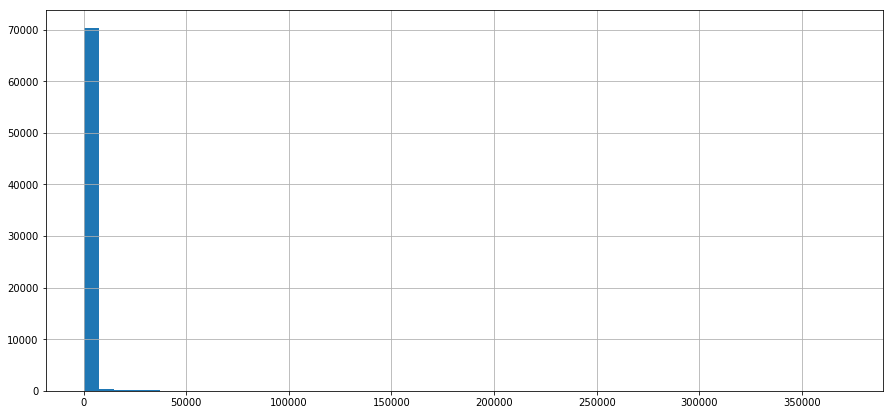

In [68]:
diff_sec.hist(bins=50, figsize=(15, 7))

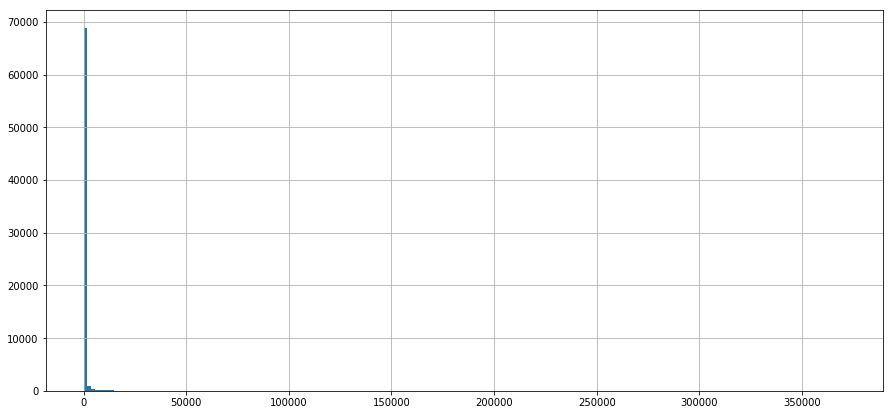

In [69]:
diff_sec.hist(bins=200, figsize=(15, 7))

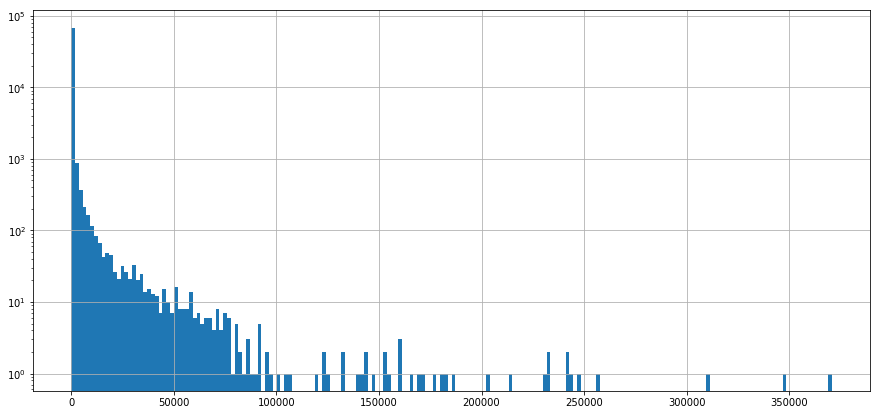

In [70]:
diff_sec.hist(bins=200, figsize=(15, 7), log=True)

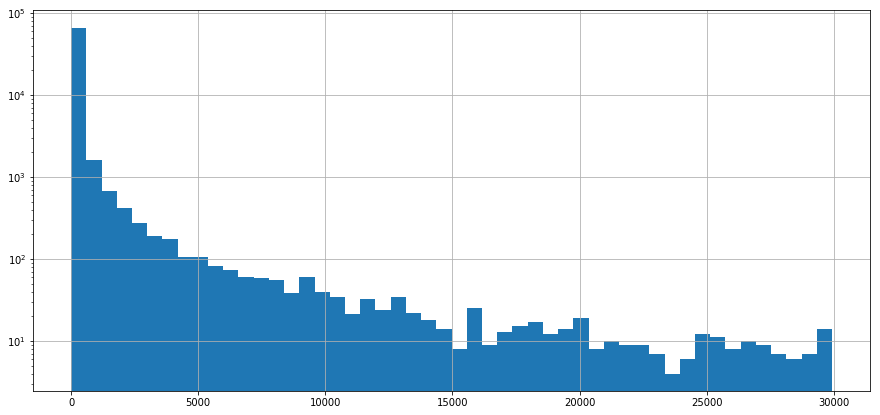

In [71]:
diff_sec[diff_sec < 30000].hist(bins=50, figsize=(15, 7), log=True)

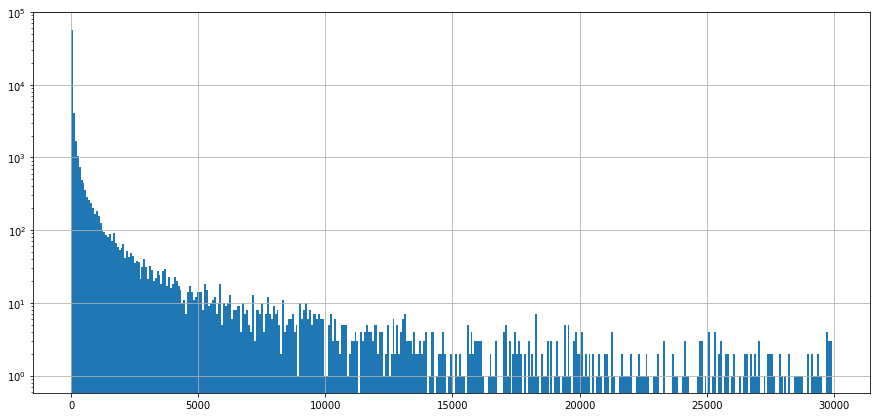

In [72]:
diff_sec[diff_sec < 30000].hist(bins=400, figsize=(15, 7), log=True)

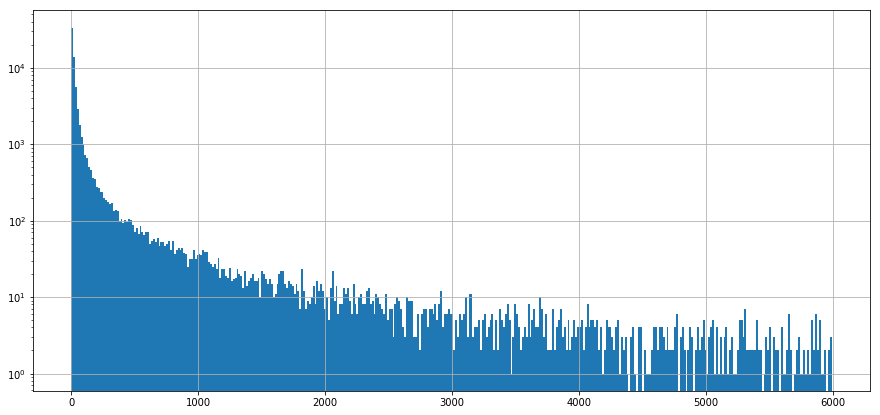

In [73]:
diff_sec[diff_sec < 6000].hist(bins=400, figsize=(15, 7), log=True)

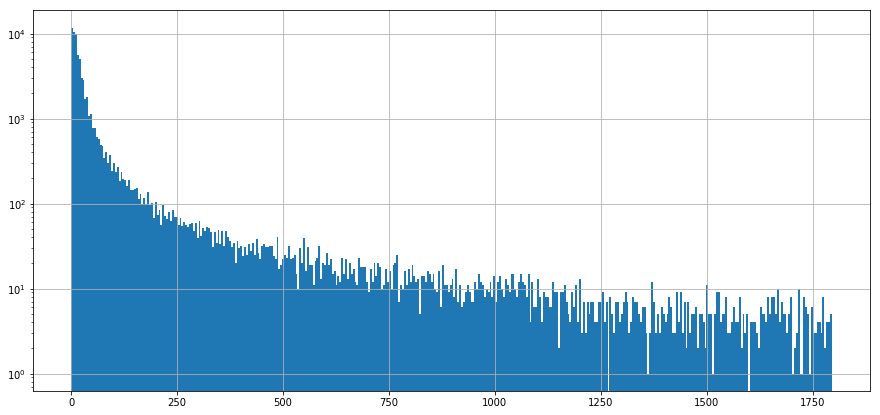

In [74]:
diff_sec[diff_sec < 1800].hist(bins=400, figsize=(15, 7), log=True)

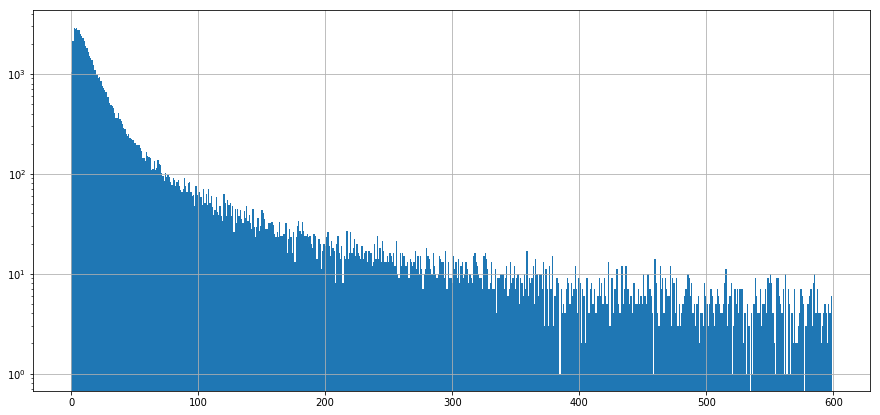

In [75]:
diff_sec[diff_sec < 600].hist(bins=600, figsize=(15, 7), log=True)

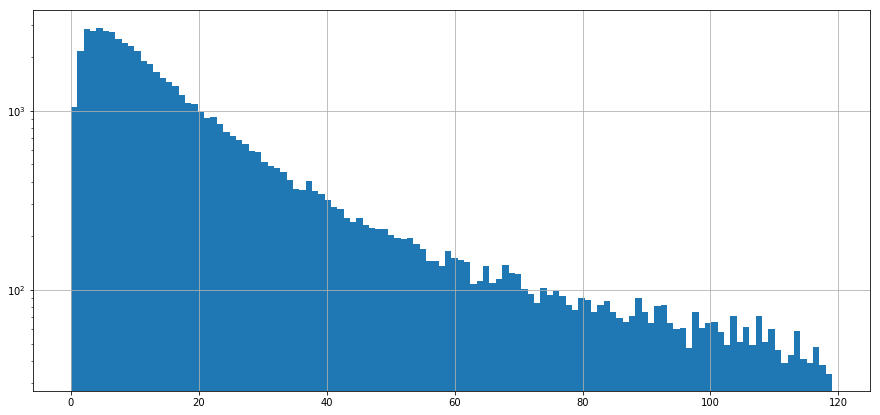

In [76]:
diff_sec[diff_sec < 120].hist(bins=120, figsize=(15, 7), log=True)

In [77]:
diff_sec.median()

16.0

In [78]:
list(np.arange(0., 1.1, .2))

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]

In [79]:
diff_sec.quantile(np.arange(0., 1.01, .02))

0.00         0.0
0.02         1.0
0.04         1.0
0.06         2.0
0.08         2.0
0.10         3.0
0.12         3.0
0.14         4.0
0.16         4.0
0.18         5.0
0.20         5.0
0.22         6.0
0.24         6.0
0.26         7.0
0.28         8.0
0.30         8.0
0.32         9.0
0.34         9.0
0.36        10.0
0.38        11.0
0.40        12.0
0.42        12.0
0.44        13.0
0.46        14.0
0.48        15.0
0.50        16.0
0.52        17.0
0.54        18.0
0.56        20.0
0.58        21.0
0.60        23.0
0.62        25.0
0.64        27.0
0.66        29.0
0.68        32.0
0.70        35.0
0.72        39.0
0.74        44.0
0.76        50.0
0.78        58.0
0.80        69.0
0.82        85.0
0.84       106.0
0.86       138.0
0.88       189.0
0.90       278.5
0.92       439.0
0.94       752.1
0.96      1502.0
0.98      4506.9
1.00    370760.0
Name: DateTime, dtype: float64

Looks like 120 seconds will be a good threshold for marking message as part of an interaction.
But it generates lots of big edges, so 30 seems better to visualize.


In [80]:
cutoff_time = 30

In [81]:
responders = df[df['DateTime'].diff() < datetime.timedelta(seconds=cutoff_time)]
receivers = responders.shift(1)

In [82]:
receivers.iloc[0] = df.loc[responders.index[0] - 1]
receivers['UserID'] = receivers['UserID'].astype(np.int64)

In [83]:
receivers.head(5)

,UserID,UserName,MessageBody,DateTime
1,100000709186976,Filip Vacek,NaN,2018-03-14 11:45:37
2,1806519497,Filip Poetyk Skoumal,"Otazka do plena...holka, se kterou mam v sobot...",2018-03-14 11:45:57
3,1806519497,Filip Poetyk Skoumal,Atd,2018-03-14 11:45:59
5,1806519497,Filip Poetyk Skoumal,Jaky mate na to nazor? :),2018-03-14 11:46:09
6,100000709186976,Filip Vacek,Jak se ti ona sama svěřila tak aby byla laťka ...,2018-03-14 11:47:32


In [84]:
responders.head(5)

,UserID,UserName,MessageBody,DateTime
1,1806519497,Filip Poetyk Skoumal,"Otazka do plena...holka, se kterou mam v sobot...",2018-03-14 11:45:57
2,1806519497,Filip Poetyk Skoumal,Atd,2018-03-14 11:45:59
3,1806519497,Filip Poetyk Skoumal,Jaky mate na to nazor? :),2018-03-14 11:46:09
5,100000709186976,Filip Vacek,Jak se ti ona sama svěřila tak aby byla laťka ...,2018-03-14 11:47:32
6,100000709186976,Filip Vacek,Sděl jí sám co uznáš za vhodné ;),2018-03-14 11:47:41


In [85]:
receivers.head(26).tail(5)

,UserID,UserName,MessageBody,DateTime
36,1806519497,Filip Poetyk Skoumal,😂,2018-03-14 13:02:23
37,100000709186976,Filip Vacek,Tak s tím musíš zabojovat sám aby si uměl říct...,2018-03-14 13:02:32
38,1556658182,Matěj Račinský,přesně,2018-03-14 13:02:46
39,1556658182,Matěj Račinský,"prostě si sám udělej jasno v tom, s čím se jí ...",2018-03-14 13:03:13
41,1556658182,Matěj Račinský,"tocje normální, že člověk hnef nevysype všechn...",2018-03-14 13:03:36


In [86]:
responders.head(26).tail(5)

,UserID,UserName,MessageBody,DateTime
36,100000709186976,Filip Vacek,Tak s tím musíš zabojovat sám aby si uměl říct...,2018-03-14 13:02:32
37,1556658182,Matěj Račinský,přesně,2018-03-14 13:02:46
38,1556658182,Matěj Račinský,"prostě si sám udělej jasno v tom, s čím se jí ...",2018-03-14 13:03:13
39,1556658182,Matěj Račinský,"tocje normální, že člověk hnef nevysype všechn...",2018-03-14 13:03:36
41,1806519497,Filip Poetyk Skoumal,"Mel jsem dneska vysprchovat klienta, ale on ri...",2018-03-14 13:08:00


In [87]:
connections = pd.concat((responders['UserID'].rename('responder'), receivers['UserID'].rename('receiver')), axis=1)
connections['weight'] = 1
connections['mess'] = responders['MessageBody']
connections

,responder,receiver,weight,mess
1,1806519497,100000709186976,1,"Otazka do plena...holka, se kterou mam v sobot..."
2,1806519497,1806519497,1,Atd
3,1806519497,1806519497,1,Jaky mate na to nazor? :)
5,100000709186976,1806519497,1,Jak se ti ona sama svěřila tak aby byla laťka ...
6,100000709186976,100000709186976,1,Sděl jí sám co uznáš za vhodné ;)
7,100000709186976,100000709186976,1,Můžeš vše a nemusíš.
8,1806519497,100000709186976,1,"P. S. Dulezite vedet, ze jsem te dane slecne, ..."
10,100000906663140,1806519497,1,To je... Docela fajn :)
11,100000709186976,100000906663140,1,Tak o to líp (y)
13,100000709186976,100000709186976,1,Hele takhle neboj se jí otevřit trochu ze sebe...


In [88]:
df['UserName'].unique().size

21

In [89]:
# making connections symmetric
connections_one = connections
connections_two = connections_one.copy()
cols = connections_two.columns
connections_two.columns = [cols[1], cols[0], cols[2], cols[3]]

In [90]:
connections = pd.concat((connections_one, connections_two), sort=True)
connections

,mess,receiver,responder,weight
1,"Otazka do plena...holka, se kterou mam v sobot...",100000709186976,1806519497,1
2,Atd,1806519497,1806519497,1
3,Jaky mate na to nazor? :),1806519497,1806519497,1
5,Jak se ti ona sama svěřila tak aby byla laťka ...,1806519497,100000709186976,1
6,Sděl jí sám co uznáš za vhodné ;),100000709186976,100000709186976,1
7,Můžeš vše a nemusíš.,100000709186976,100000709186976,1
8,"P. S. Dulezite vedet, ze jsem te dane slecne, ...",100000709186976,1806519497,1
10,To je... Docela fajn :),1806519497,100000906663140,1
11,Tak o to líp (y),100000906663140,100000709186976,1
13,Hele takhle neboj se jí otevřit trochu ze sebe...,100000709186976,100000709186976,1


In [91]:
conn_weights = connections.groupby(['responder', 'receiver'])['weight'].count()
conn_weights

responder        receiver       
1556658182       1556658182         8770
                 1604087996          920
                 1684920235            1
                 1685746392          244
                 1806519497         6100
                 1829107764         2565
                 100000075172365      23
                 100000709186976       9
                 100000845933766    1724
                 100000880318601      30
                 100000906663140     566
                 100001322671857       2
                 100003368497248     451
                 100006089377536      18
                 100008379156435      78
                 100009020579385       2
                 100010948904413       1
                 100015372600703     104
1604087996       1556658182          920
                 1604087996         2280
                 1684920235            4
                 1685746392           63
                 1806519497         1146
                 1829107

In [92]:
# with < I am excluding references to itself
one_half_indices = conn_weights.index.get_level_values(0) < conn_weights.index.get_level_values(1)
one_half_indices.size

233

In [93]:
edge_weights = conn_weights[one_half_indices]
edge_weights

responder        receiver       
1556658182       1604087996          920
                 1684920235            1
                 1685746392          244
                 1806519497         6100
                 1829107764         2565
                 100000075172365      23
                 100000709186976       9
                 100000845933766    1724
                 100000880318601      30
                 100000906663140     566
                 100001322671857       2
                 100003368497248     451
                 100006089377536      18
                 100008379156435      78
                 100009020579385       2
                 100010948904413       1
                 100015372600703     104
1604087996       1684920235            4
                 1685746392           63
                 1806519497         1146
                 1829107764          338
                 100000075172365      31
                 100000709186976       5
                 1000008

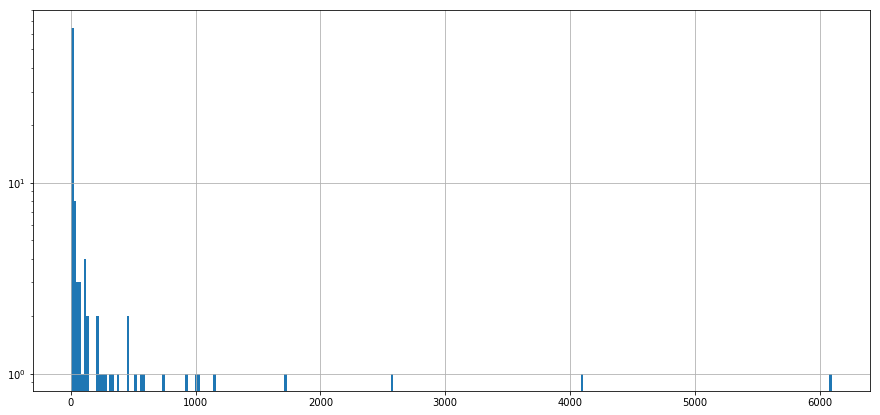

In [94]:
edge_weights.hist(bins=300, log=True, figsize=(15, 7))

(0, 300)

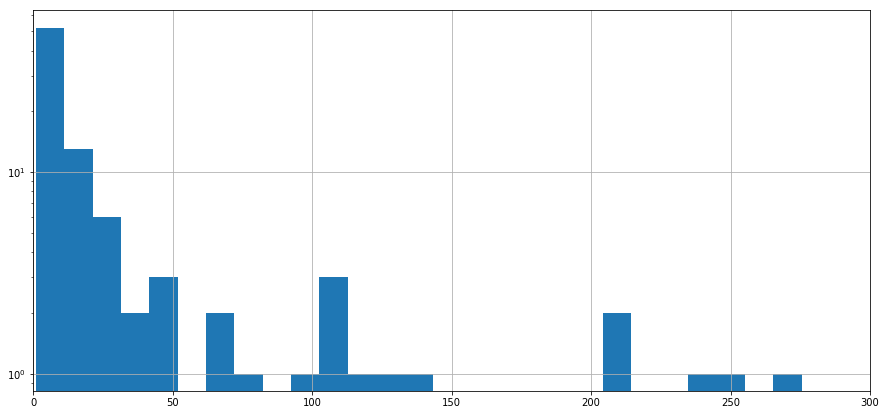

In [95]:
edge_weights.hist(bins=600, log=True, figsize=(15, 7))
plt.xlim(0, 300)

In [96]:
# cutting off not few interactions
min_replies = 100
edge_weights = edge_weights[edge_weights >= min_replies]

use_log = True
if use_log:
    edge_weights = np.log(edge_weights)

#### making user if to username map

In [97]:
df['UserID'].unique().size

21

In [98]:
df['UserName'].unique().size

21

In [99]:
id_and_name = df.groupby(['UserID', 'UserName']).count().index.to_frame().reset_index(drop=True)

def select_name(x):
    if len(x) > 1:
        return x[~x.str.match('Removed user')]
    return x

id_to_name = id_and_name.groupby('UserID').agg(select_name)
id_to_name

,UserName
UserID,
1556658182,Matěj Račinský
1604087996,Tomáš Račinský
1684920235,Daniel Kos
1685746392,Vít Dang
1806519497,Filip Poetyk Skoumal
1829107764,Radek Jaša
100000075172365,Tomáš Kaizr
100000709186976,Filip Vacek
100000845933766,Slabko Shiro


### exporting to gephi

In [101]:
def dists_to_csv(nodes_name, edges_name, id_to_name, edge_weights):
    edges = edge_weights.reset_index().rename(columns={'responder': 'source', 'receiver': 'target'})
    nodes = id_to_name.reset_index().rename(columns={'UserID': 'id', 'UserName': 'label'})
    edges['type'] = 'undirected'
    
    nodes.to_csv(nodes_name, index=False, sep=',', encoding='utf-8')
    edges.to_csv(edges_name, index=False, sep=',', encoding='utf-8')

suffix = '_log' if use_log else ''
dists_to_csv('wongwahmeni-people.csv', f'wongwahmeni-connections_time_{cutoff_time}_min_repl_{min_replies}{suffix}.csv', id_to_name, edge_weights)

## vocabulary analysis

In [ ]:
all_words = df_messages['message'].str.split(' ', expand=True).stack().reset_index(drop=True, level=1)

In [ ]:
all_words.unique().shape

In [ ]:
all_words.str.lower().unique().shape

In [ ]:
all_words_cleaned = all_words.str.lower().str.strip('.,?-–()')
words_historgram = all_words_cleaned.value_counts()
words_historgram.head()

In [ ]:
all_words_cleaned.unique().shape

In [ ]:
words_historgram[:30].plot.bar(figsize=(30, 10))
plt.xticks(rotation=0)

In [ ]:
wordcloud = WordCloud(background_color='white', width=800, height=400, margin=0).generate_from_frequencies(words_historgram)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('imgs/wordcloud-scitani.png')

In [ ]:
from urllib import request

data = request.urlopen('https://raw.githubusercontent.com/stopwords-iso/stopwords-cs/master/stopwords-cs.txt')
all_stopwords = [line.decode('utf-8').replace('\n', '') for line in data]
# todo: split them correctly and for vocalulary calculation use only emotes filtering
emotes_stopwords = [':d', ':', '\?', ';', ':-d', '\^\^', ':dd', 'xd', ':3', '=d', ':p',  ':/', ':>', '\+', 'o_o', 'd:', '>', ':\'d', ':"d', '\n', ':dd', ':ddd', ':dddd', 'x', 'xp']
my_stopwords = ['no', '', 'jo', 'sa', 'the', '=d', 'fakt', 'celkem', 'sem', 'ja', 'som', 'ako', 'of', 'nekdo', 'bych', 'sou', '2', 'jj', 'is', 'mam', '3', '\n']
all_stopwords += my_stopwords
all_stopwords += emotes_stopwords

In [ ]:
stopwords = list(set(all_stopwords).intersection(set(words_historgram.index)))
words_historgram_cleaned = words_historgram.drop(stopwords)
stopwords

In [ ]:
words_historgram_cleaned[:30].plot.bar(figsize=(30, 10))
plt.xticks(rotation=0)

In [ ]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(words_historgram_cleaned)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('imgs/wordcloud-scitani-cleaned.png')

In [ ]:
def messages_to_words_hist(mess_series):
    all_words = mess_series.str.split(' ', expand=True).stack().reset_index(drop=True, level=1)
    words_historgram = all_words.str.lower().str.strip('.,?-–()').value_counts()
    stopwords = list(set(all_stopwords).intersection(set(words_historgram.index)))
    words_historgram_cleaned = words_historgram.drop(stopwords)
    return words_historgram_cleaned

### drawing peoples histograms and wordclouds

In [ ]:
for person in ['Adam Furik', 'Marian Čejka', 'Martin Choma', 'Honza Horgoš', 'Zdeněk Pala', 'Jan Schröpfer', 'Ladislav Popelka', 'Žožo Králík', 'Matěj Račinský', 'Niko Albert', 
               'Adam Krása', 'Matěj Fabián', 'Vojtěch Malman Divák', 'Sanya Litvyak', 'Tadeáš Jojko', 'Filip Tran', 'Michal Mikuš', 'Zuzana Macháčková', 'Zdeněk Pešek', 'Dominik Krisztof', 
              'Eliška Wernerová']:
    personal_histogram = messages_to_words_hist(df_messages[df_messages['from_name'] == person]['message'])
    personal_histogram[:30].plot.bar(figsize=(30, 10))
    plt.xticks(rotation=0)
    plt.savefig(osp.join('imgs', person + '-hist.png'))
    plt.show()
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(personal_histogram)
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(osp.join('imgs', person + '-cloud.png'))
    plt.show()